In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
import river
from river import datasets
from river import metrics
from river import time_series
url = r"C:\Users\lalae\Documents\updated_influxdata.csv" #Se llama con la url el repositorio en GitHub con el data set de series temporales.
data = pd.read_csv(url)

data["distancia2"] = pd.to_numeric(data["distancia2"], errors="coerce")
data = data.dropna(subset=["distancia2"])  # Eliminar filas con valores no válidos en VALOR

Para definir ese modelo, hace falta especificar diferentes parámetros:
*   alpha: impone el suavizado para el nivel
*   beta: suavizado para la tendencia.
*   gamma: suavizado para la estacionalidad.
*   seasonality: se establece el número de períodos para la temporada.


In [21]:
model = time_series.HoltWinters(
    alpha=0.4, #Este valor da un peso moderado a los valores más recientes al actualizar el nivel de la serie.
    beta=0.05,  #Un valor bajo para beta es adecuado porque la tendencia no es evidente ni fuerte en la serie.
    gamma=0.7, #Un valor alto para gamma se elige para capturar la estacionalidad, ya que es el componente más prominente en los datos.
    seasonality=12, #Se mantiene un valor de 12 dado que los datos son valores mensuales agrupados por años.
    multiplicative=True #Dado que los valores absolutos fluctúan ligeramente en relación con su magnitud general, una estacionalidad multiplicativa es adecuada.
)

In [22]:
metric = metrics.MAE()

In [23]:
contador = 0
periodoAprendizaje = 25

observed = []
predicted = []

limite_predicciones=10 #Establecemos un limite para las predicciones acorde a la actividad.

# Iterar sobre las filas del DataFrame
for _, row in data.iterrows():  # _ ignora el índice, row es un objeto que contiene los datos de la fila
    valor = row["distancia2"]  # Extraer el valor de la columna VALOR
    model.learn_one(valor)
    contador += 1

    if contador> periodoAprendizaje and len(predicted) < limite_predicciones: #Se realizarán predicciones solo después del período de aprendizaje y hasta un máximo de 10.
      pred = model.forecast(1)
      print("Predicciones:",pred)
      observed.append(valor)
      predicted.append(pred)

    if len(predicted) >= limite_predicciones:
      break

Predicciones: [31.967289608201206]
Predicciones: [10.191688609484409]
Predicciones: [24.073685352158694]
Predicciones: [31.20090833417465]
Predicciones: [140.64869836106436]
Predicciones: [111.58063174573336]
Predicciones: [86.08989936690173]
Predicciones: [55.92731869136489]
Predicciones: [27.25949364691532]
Predicciones: [11.812375310488068]


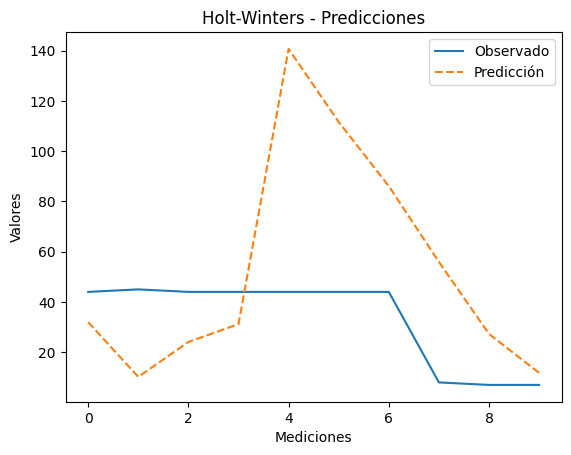

In [24]:
plt.plot(observed, label='Observado')
plt.plot(predicted, label='Predicción', linestyle='--')
plt.legend()
plt.xlabel('Mediciones')
plt.ylabel('Valores')
plt.title('Holt-Winters - Predicciones')
plt.show()